<a href="https://colab.research.google.com/github/AndreLYL/Tensorflow-learning/blob/master/Tensorflow_Udacity_tutorial_04_cat_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [0]:
try:
  # use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [0]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [0]:
# 导入数据
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=_URL, extract=True)

In [0]:
# list the directories with the following terminal command
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [0]:
# assign variables with the proper file path for the training and validation sets
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [0]:
# 显示在训练和验证文件中有多少张图片
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)

print('total training images:', total_train)
print('total validation images:', total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total training images: 2000
total validation images: 1000


In [0]:
# Setting Model Parameters
BATCH_SIZE = 100    # 在更新模型变量之前要处理的训练示例数 
IMG_SHAPE = 150     # 图像的大小是150*150

In [0]:
# Data Preparation
train_image_generator     = ImageDataGenerator(rescale=1./255)
validation_image_generator  = ImageDataGenerator(rescale=1./255)


In [0]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                           directory=train_dir,                
                                           shuffle=True,       # 在训练过程中，随机排列图像的顺序，使模型不会记住图像的顺序。(验证过程不需要)     
                                           target_size=(IMG_SHAPE, IMG_SHAPE), #(150, 150)               
                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [0]:
val_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                           directory=validation_dir,                
                                           shuffle=False,       # (验证过程不需要)     
                                           target_size=(IMG_SHAPE, IMG_SHAPE), #(150, 150)               
                                           class_mode='binary')

Found 1000 images belonging to 2 classes.


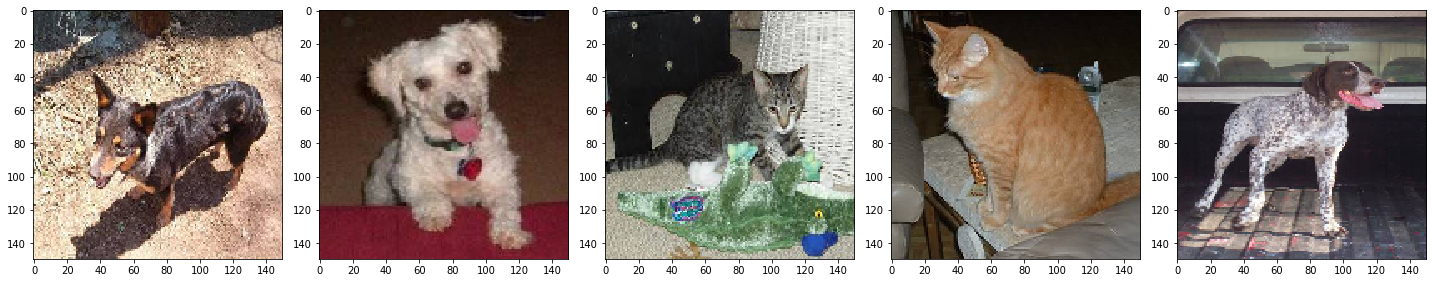

In [0]:
# Visualizing Training images
sample_training_images, _ = next(train_data_gen)

def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

plotImages(sample_training_images[:5])

In [0]:
# Model Creation
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),                                
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),                                
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),                                
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),                                
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)

])

In [0]:
# compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
# model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [0]:
# Train the model
EPOCHS = 100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))

)

Train for 20 steps, validate for 10 steps
Epoch 1/100
20/20 [==============================] - 14s 710ms/step - loss: 0.8200 - accuracy: 0.4960 - val_loss: 0.6922 - val_accuracy: 0.5030
Epoch 2/100
20/20 [==============================] - 8s 399ms/step - loss: 0.6892 - accuracy: 0.5200 - val_loss: 0.6713 - val_accuracy: 0.6420
Epoch 3/100
20/20 [==============================] - 8s 393ms/step - loss: 0.6654 - accuracy: 0.5975 - val_loss: 0.6711 - val_accuracy: 0.5680
Epoch 4/100
20/20 [==============================] - 8s 399ms/step - loss: 0.6574 - accuracy: 0.6055 - val_loss: 0.6429 - val_accuracy: 0.6560
Epoch 5/100
20/20 [==============================] - 8s 401ms/step - loss: 0.5992 - accuracy: 0.6875 - val_loss: 0.6050 - val_accuracy: 0.6610
Epoch 6/100
20/20 [==============================] - 8s 401ms/step - loss: 0.5598 - accuracy: 0.7075 - val_loss: 0.6001 - val_accuracy: 0.6700
Epoch 7/100
20/20 [==============================] - 8s 396ms/step - loss: 0.5189 - accuracy: 0.738

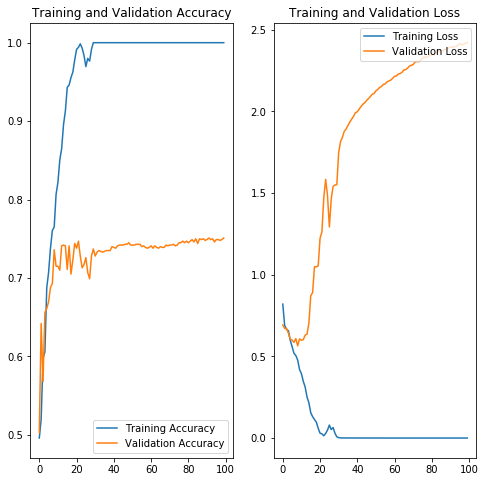

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()